#Đề tài: Dự đoán RỐI LOẠN TÂM THẦN
* Mục tiêu: Dự đoán liệu một bệnh nhân nên được điều trị về tình trạng tâm thần của họ hay không dựa trên các giá trị thu thập được trong tập dữ liệu này
* Case study: Bộ dữ liệu này được thu thập từ một cuộc khảo sát năm 2014, nhằm đo lường thái độ của mọi người đối với vấn đề sức khỏe tâm thần và tần suất các rối loạn sức khỏe tâm thần tại môi trường làm việc trong ngành công nghệ.

# Import Library

In [ ]:
#Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import tree

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score


#ensemble
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import SimpleImputer

#Library label encoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [ ]:
#import dataset
df = pd.read_csv('/content/ex1.csv')

# <b> <font color ='green' >1. Explore Data Analysis </font> <b>

# <b> <font color ='green' >1.1 Overall Info </font> <b>


In [ ]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
df.shape

(1259, 27)

*Dataframe có 1259 dòng và 27 cột*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

**Mô tả các cột**:
- Timestamp: Thời gian ghi nhận
- Age: Tuổi
- Gender: Giới tính
- Country: Quốc gia
- State: Tiểu bang/lãnh thổ (đối với Hoa Kỳ)
- Self-employed: Làm việc tự do
- Family history: Tiền sử bệnh tâm thần trong gia đình
- Treatment: Đã tìm kiếm điều trị cho tình trạng tâm thần
- Work interfere: Tình trạng tâm thần ảnh hưởng đến công việc
- No. of employees: Số lượng nhân viên trong công ty/tổ chức
- Remote work: Làm việc từ xa ít nhất 50% thời gian
- Tech company: Công ty/ tổ chức hoạt động trong lĩnh vực công nghệ
- Benefits: Công ty cung cấp lợi ích về sức khỏe tâm thần
- Care options: Biết về các tùy chọn chăm sóc sức khỏe tâm thần
- Wellness program: Có thảo luận về sức khỏe tâm thần trong chương trình chăm sóc sức khỏe
- Seek help: Công ty cung cấp nguồn tài liệu để tìm hiểu về sức khỏe tâm thần và cách tìm kiếm sự giúp đỡ
- Anonymity: Bảo vệ danh tính khi sử dụng tài liệu điều trị
- Leave: Khả năng nghỉ phép y tế cho tình trạng sức khỏe tâm thần
- Mental health consequence: Thảo luận về sức khỏe tâm thần với nhà tuyển dụng có hậu quả tiêu cực
- Phys health consequence: Thảo luận về sức khỏe vật lý với nhà tuyển dụng có hậu quả tiêu cực
- Coworkers: Sẵn sàng thảo luận về sức khỏe tâm thần với đồng nghiệp
- Supervisor: Sẵn sàng thảo luận về sức khỏe tâm thần với cấp trên trực tiếp
- Mental health interview: Sẵn sàng thảo luận về sức khỏe tâm thần trong buổi phỏng vấn tuyển dụng
- Phys health interview: Sẵn sàng thảo luận về sức khỏe vật lý trong buổi phỏng vấn tuyển dụng
- Mental vs physical: Sự coi trọng của sức khỏe tâm thần so với sức khỏe vật lý từ phía nhà tuyển dụng
- Obs consequence: Quan sát các hậu quả tiêu cực đối với đồng nghiệp có vấn đề sức khỏe tâm thần
- Comments: Ghi chú hoặc ý kiến bổ sung

In [ ]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


**Min là -1726 và max là 999999999
=>> Đây là outliers cần loại bỏ**

## <b> <font color ='green' >1.2 Clean missing values

### <b> <font color ='green' >1.2.a Check Null values


In [ ]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [ ]:
df.drop(columns = ['Timestamp','state','Country','comments'], inplace = True)

In [ ]:
df.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

### <b> <font color ='green' >1.2.b Clean missing values of self_employed column

In [ ]:
df['self_employed'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [ ]:
df['self_employed'].value_counts()


No     1095
Yes     146
Name: self_employed, dtype: int64

In [ ]:
#Chúng ta sẽ giả định rằng khi người tham gia khảo sát đang thực hiện bản khảo sát này, họ đã bỏ qua câu hỏi này vì họ đang làm việc tại một công ty. Do đó, chúng ta sẽ điền vào các giá trị Null bằng 'No'.

df['self_employed'].replace(np.NaN,'No',inplace=True)


In [ ]:
df['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

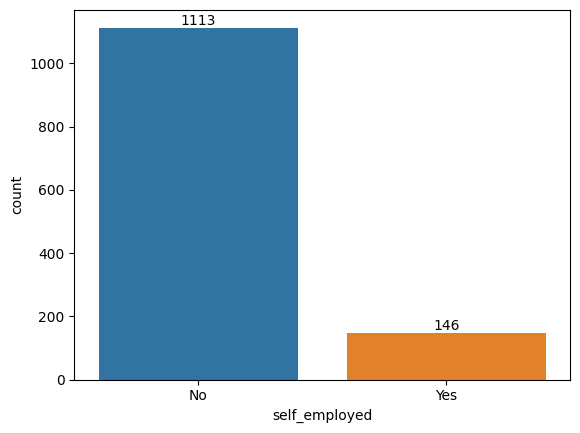

In [ ]:
ax = sns.countplot(data = df , x = 'self_employed');
ax.bar_label(ax.containers[0]);

### <b> <font color ='green' >1.2.c Clean missing values of work_interfere column

In [ ]:
df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [ ]:
df['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [ ]:
df['work_interfere'].replace(np.NaN, "Don't Know",inplace = True)


In [ ]:
df['work_interfere'].value_counts()

Sometimes     465
Don't Know    264
Never         213
Rarely        173
Often         144
Name: work_interfere, dtype: int64

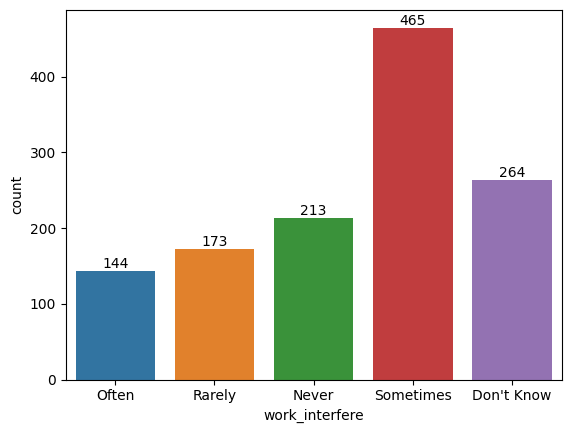

In [ ]:
ax = sns.countplot(data = df , x = 'work_interfere');
#Add the value of each parametr on the Plot
ax.bar_label(ax.containers[0]);

## <b> <font color ='green' >1.3 Checking values of all columns

In [ ]:
my_list = df.columns.values.tolist()

for column in my_list:
  print(column)
  print(df[column].unique())

Age
[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
Gender
['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning andr

### <b> <font color ='green' >1.3.a  Age Column

<Axes: >

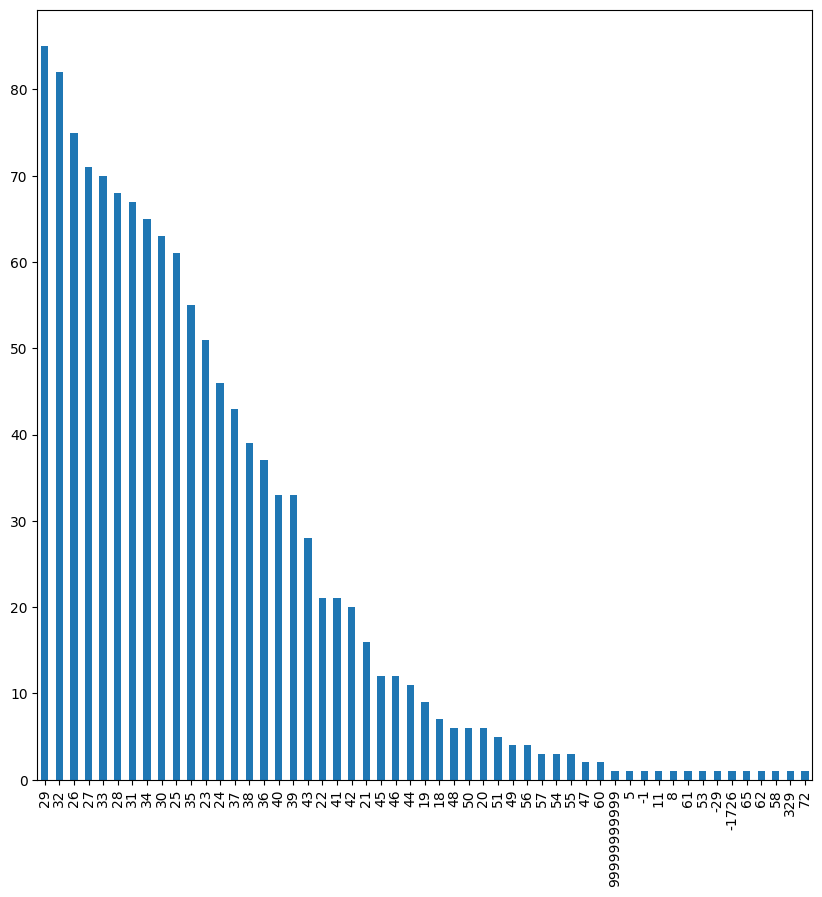

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(10, 10))
df['Age'].value_counts().plot( kind= 'bar')

In [ ]:
outliers =[]
for age in df['Age'].values:
  if age < 0 or age >100 :
    outliers.append(age)
    print(outliers)


[-29]
[-29, 329]
[-29, 329, 99999999999]
[-29, 329, 99999999999, -1726]
[-29, 329, 99999999999, -1726, -1]


In [ ]:
#Bởi vì chỉ có 5 outliers trong tổng số 1259 giá trị nên ta có thể loại bỏ 5 outliers này
df = df.loc[(df['Age'] > 18) & (df['Age'] <100)]

In [ ]:
# 0 giá trị Age là outlier
print(df[df["Age"].isin(outliers)] )


Empty DataFrame
Columns: [Age, Gender, self_employed, family_history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence]
Index: []

[0 rows x 23 columns]


In [ ]:
#Nhóm lại tuổi
Age_Group = pd.cut(df['Age'],bins=[17,23,30,51,100],labels=['18-22', '23-30 ','30-50', '> 51'])
df.insert(23,'Age_Group',Age_Group)
df['Age_Group'].unique()


['30-50', '18-22', '23-30 ', '> 51']
Categories (4, object): ['18-22' < '23-30 ' < '30-50' < '> 51']

In [ ]:
df['Age_Group'].value_counts()

30-50     651
23-30     469
18-22     103
> 51       21
Name: Age_Group, dtype: int64

*Hầu hết là người trưởng thành mắc bệnh về tâm lý*

In [ ]:
df = df.drop(columns='Age')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Gender                     1244 non-null   object  
 1   self_employed              1244 non-null   object  
 2   family_history             1244 non-null   object  
 3   treatment                  1244 non-null   object  
 4   work_interfere             1244 non-null   object  
 5   no_employees               1244 non-null   object  
 6   remote_work                1244 non-null   object  
 7   tech_company               1244 non-null   object  
 8   benefits                   1244 non-null   object  
 9   care_options               1244 non-null   object  
 10  wellness_program           1244 non-null   object  
 11  seek_help                  1244 non-null   object  
 12  anonymity                  1244 non-null   object  
 13  leave                      1244 n

### <b> <font color ='green' >1.3.b  Gender Column

In [ ]:
df1= df['Gender'].unique()
print(df1)

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'Cis Male' 'Woman' 'f' 'Mal' 'Male (CIS)'
 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah' 'Enby'
 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender' 'cis-female/femme'
 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male ' 'Man' 'Trans woman'
 'msle' 'Neuter' 'Female (trans)' 'queer' 'Female (cis)' 'Mail' 'cis male'
 'Malr' 'femail' 'Cis Man'
 'ostensibly male, unsure what that really means']


In [ ]:
#Nhóm lại các giới tính thành 3 loại chính
male_string = ["M", "Male", "male", "m", "Male-ish", "maile", "Cis Male", "Mal", "Male (CIS)","Make",
               "Male ", "Man","msle", "Mail", "cis male","Malr","Cis Man"]
female_string = ["Female", "female", "Cis Female", "F","Woman",  "f", "Femake","woman", "Female ",
                 "cis-female/femme","Female (cis)","femail"]
others_string = ["Trans-female", "something kinda male?", "queer/she/they", "non-binary","Nah", "all",
                 "Enby", "fluid", "Genderqueer", "Androgyne", "Agender", "male leaning androgynous", "Guy (-ish) ^_^",
                 "Trans woman", "Neuter", "Female (trans)", "queer", "ostensibly male, unsure what that really means"]

for index, row in df.iterrows():

    if str(row.Gender) in male_string:
        df['Gender'].replace(to_replace=row.Gender, value='male', inplace=True)

    if str(row.Gender) in female_string:
        df['Gender'].replace(to_replace=row.Gender, value='female', inplace=True)

    if str(row.Gender) in others_string:
        df['Gender'].replace(to_replace=row.Gender, value='other', inplace=True)


print(df['Gender'].unique())

['female' 'male' 'other']


In [ ]:
df['Gender'].value_counts()


male      981
female    246
other      17
Name: Gender, dtype: int64

*Hầu như người mắc bệnh là nam giới*

# <b> <font color ='green' >2. Data relationship
 </font> <b>

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


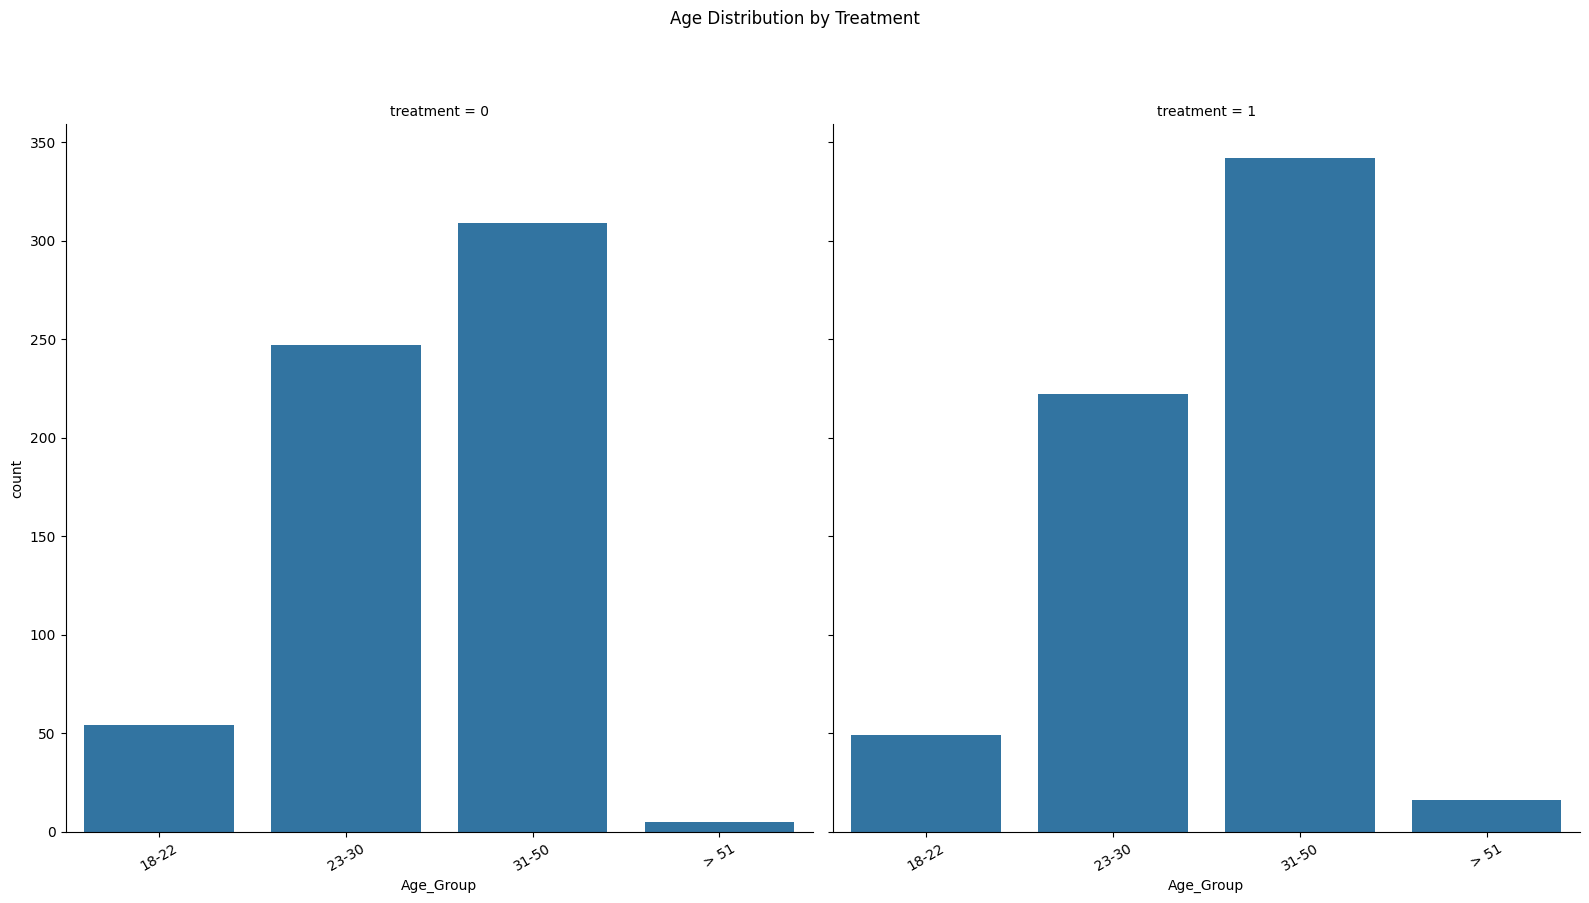

In [ ]:
#Age vs Treatment
g = sns.FacetGrid(df, col='treatment', height=8)
g = g.map(sns.countplot, "Age_Group")

for ax in g.axes.flat:
    labels = ax.get_xticklabels()
    for i, l in enumerate(labels):
        if i == 0:
            labels[i] = '18-22'
        elif i == 1.0:
            labels[i] = '23-30'
        elif i == 2.0:
            labels[i] = '31-50'
        elif i == 3.0:
            labels[i] = '> 51'
    ax.set_xticklabels(labels, rotation=30)

# Đặt tiêu đề giữa cả hai biểu đồ
g.fig.suptitle("Age Distribution by Treatment", y=1.1)

plt.show()


[0, 1, 2]
Categories (3, int64): [0, 1, 2]


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1000x600 with 0 Axes>

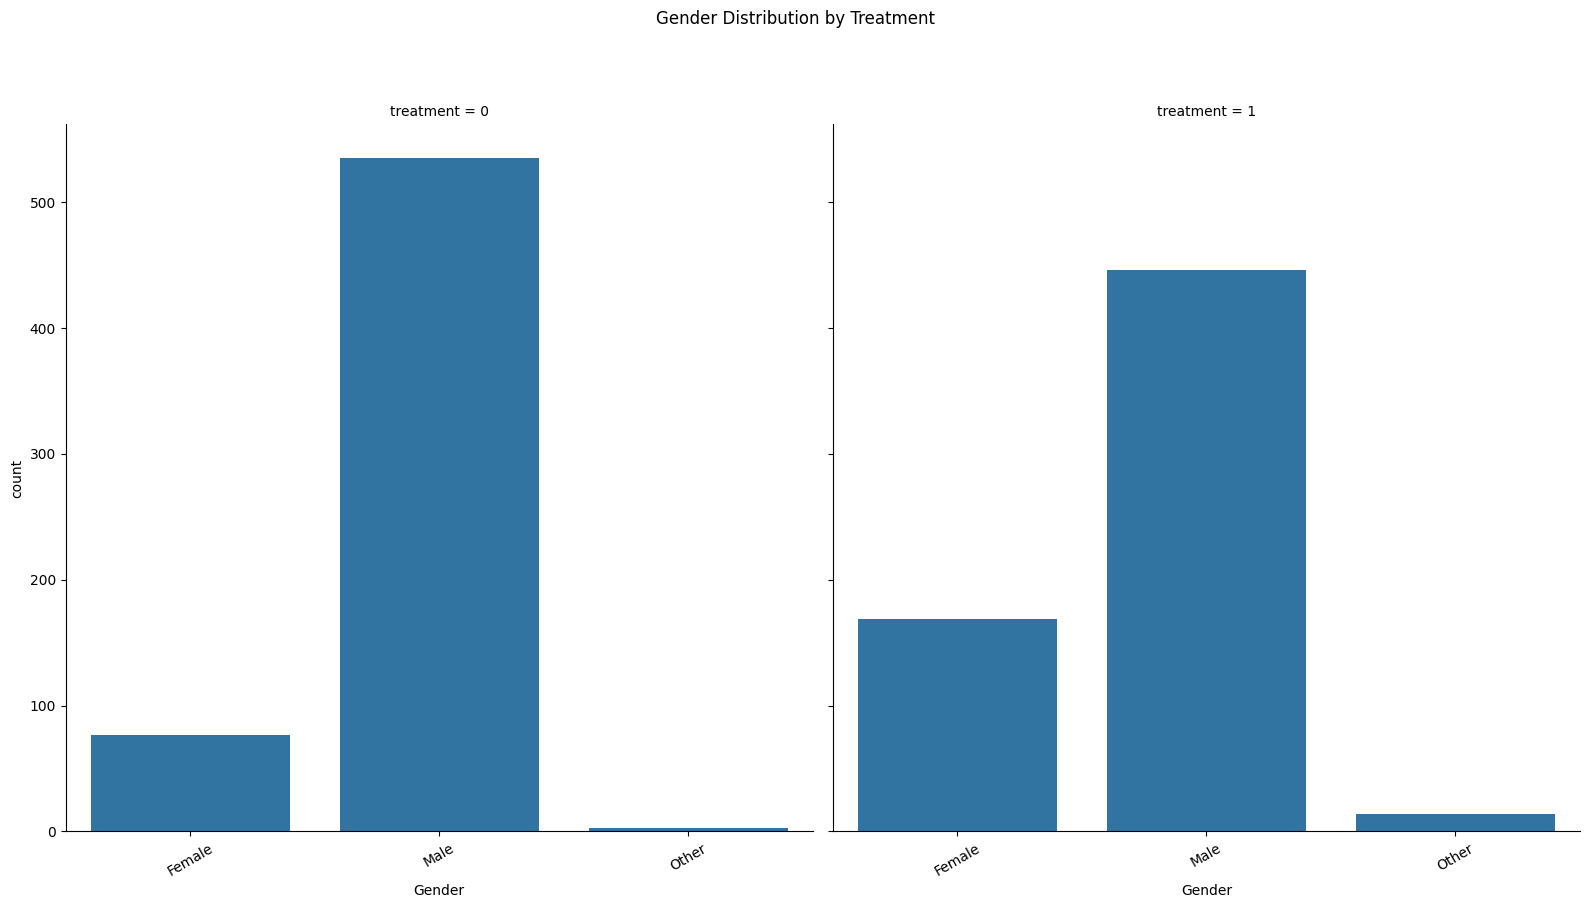

In [ ]:
#Gender vs Treatment
df1 = df
df1['Gender'] = df1['Gender'].astype('category')
print(df1['Gender'].unique())
plt.figure(figsize=(10, 6))
g = sns.FacetGrid(df1, col='treatment', height=8)
g.map(sns.countplot, 'Gender')

for ax in g.axes.flat:
    labels = ax.get_xticklabels()
    for i, l in enumerate(labels):
        if i == 0:
            labels[i] = 'Female'
        elif i == 1:
            labels[i] = 'Male'
        else:
            labels[i] = 'Other'
    ax.set_xticklabels(labels, rotation=30)

# Đặt tiêu đề giữa cả hai biểu đồ
g.fig.suptitle("Gender Distribution by Treatment", y=1.1)

plt.show()

plt.show()

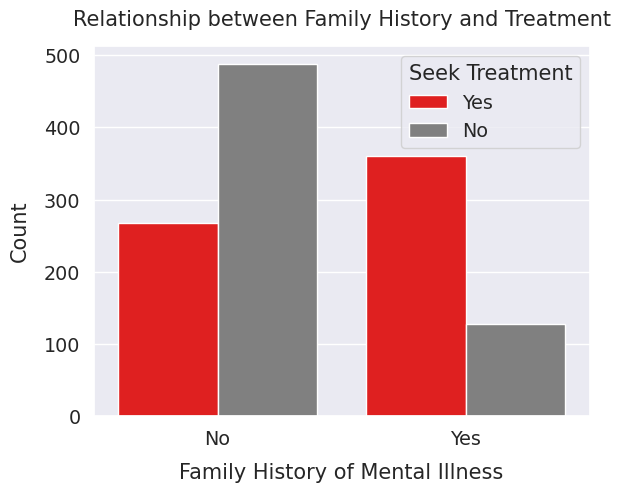

In [ ]:
#Family_History vs Treatment
sns.countplot(x='family_history', data=df, hue='treatment', palette=['red', 'gray'])
leg = plt.legend(loc='best', title='Seek Treatment')
leg._legend_box.align = "left"
plt.xlabel('Family History of Mental Illness', labelpad=10)
plt.ylabel('Count', labelpad=10)
plt.title('Relationship between Family History and Treatment', pad=15);


*Những người có tiền sử bệnh tâm thần trong gia đình có khả năng cao phát triển các vấn đề về tâm thần trong suốt đời. Như thể hiện trong biểu đồ này, điều này đã được chứng minh là đúng, khi chúng ta có thể thấy có một số lượng lớn người có tiền sử bệnh tâm thần trong gia đình và đã tìm kiếm điều trị*

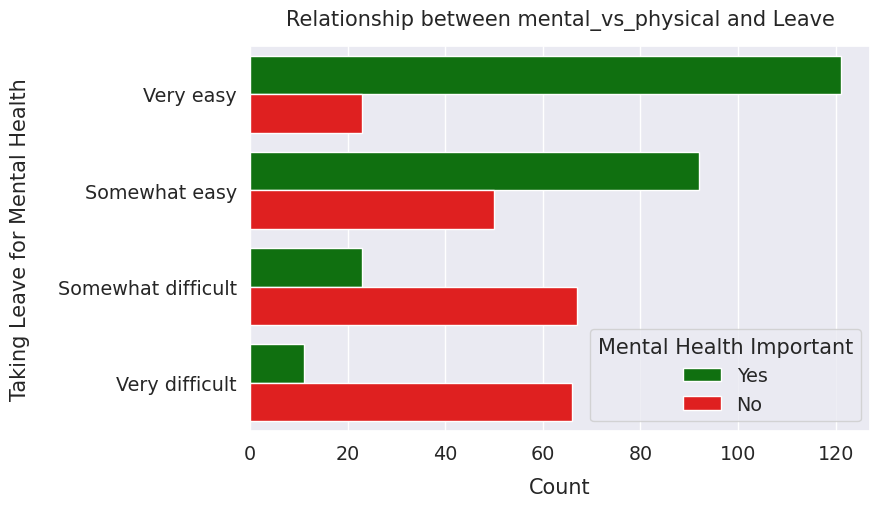

In [ ]:
#obs_consequence vs treatment
plt.figure(figsize=(8,5)) # Size of the figure
mvp = df[((df['mental_vs_physical'] == 'Yes') | (df['mental_vs_physical'] == 'No')) & (df['leave'] != "Don't know")]['leave']
test = df[((df['mental_vs_physical'] == 'Yes') | (df['mental_vs_physical'] == 'No')) & (df['leave'] != "Don't know")]['mental_vs_physical']

order = df[((df['mental_vs_physical'] == 'Yes') | (df['mental_vs_physical'] == 'No')) & (df['leave'] != "Don't know")]['leave'].value_counts().index
sns.countplot(y=mvp, data=df, order=order, hue=test, palette=['green', 'red'])

plt.xlabel('Count', labelpad=10)
plt.ylabel('Taking Leave for Mental Health', labelpad=20)
plt.title('Relationship between mental_vs_physical and Leave', pad=15)

leg = plt.legend(loc='best', title='Mental Health Important')
leg._legend_box.align = "center"

*Chúng ta có thể thấy rõ ràng rằng đối với các công ty đặt sự quan trọng cao hơn về sức khỏe tâm thần, việc cho nhân viên nghỉ phép vì sức khỏe tâm thần dễ dàng hơn. Trong khi đó, đối với các công ty không đặt nhiều tầm quan trọng đối với sức khỏe tâm thần, việc nhân viên nghỉ phép vì sức khỏe tâm thần trở nên khó khăn hơn. Các công ty nên học cách đặt sự quan trọng cao hơn đối với sức khỏe tâm thần của nhân viên, vì nó ảnh hưởng đến sự thịnh vượng cá nhân của họ tại nơi làm việc và có thể thậm chí ảnh hưởng đến hiệu suất làm việc của họ*

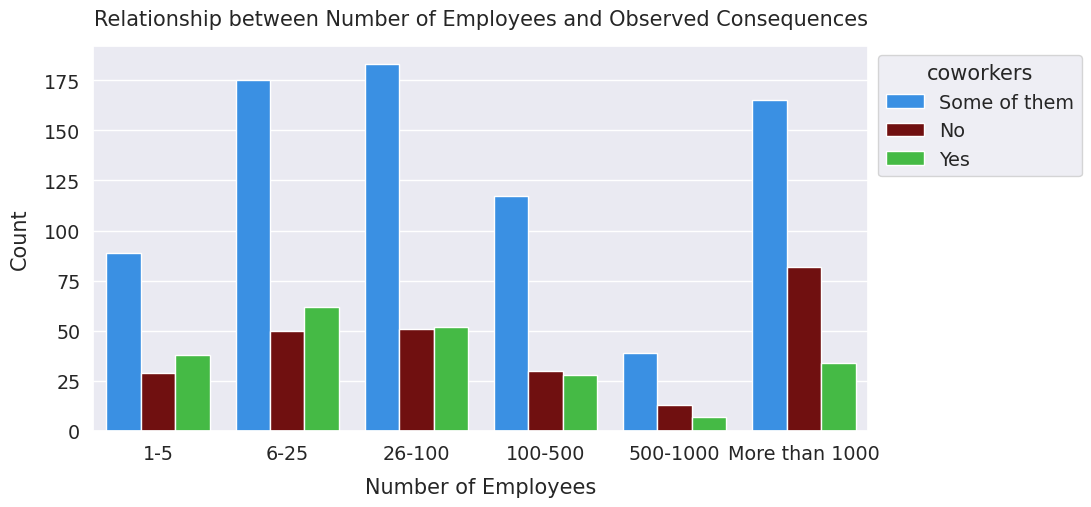

In [ ]:
#No_employees vs coworkers
plt.figure(figsize=(10,5)) # Size of the figure
order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
ax = sns.countplot(x='no_employees', hue='coworkers',  data=df, order=order, palette=['dodgerblue', 'maroon', 'limegreen'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Number of Employees', labelpad=10)
plt.ylabel('Count', labelpad=10);
plt.title('Relationship between Number of Employees and Observed Consequences', pad=15);

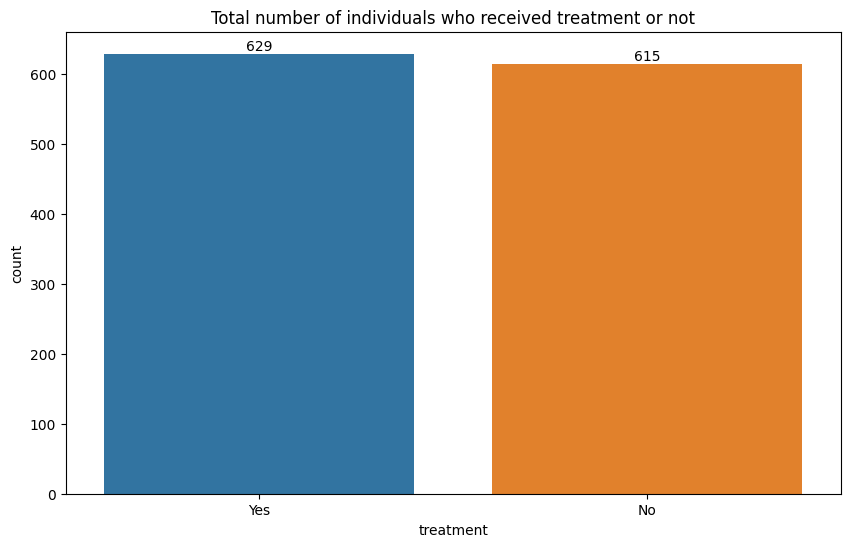

In [ ]:
#Treatment
plt.figure(figsize = (10,6));
treat = sns.countplot(data = df,  x = 'treatment');
treat.bar_label(treat.containers[0]);
plt.title('Total number of individuals who received treatment or not');

*Số lượng No và Yes tương đối cân bằng*

# <b> <font color ='green' >3. Encoding



In [ ]:
label_dict = {}
le = preprocessing.LabelEncoder()
for feature in df.columns:
  if feature != 'Age':
    le.fit(df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    df[feature] = le.transform(df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    label_dict[labelKey] =labelValue
  else:
    label_dict['label_Age'] = list(df['Age'])


In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Gender                     1244 non-null   int64
 1   self_employed              1244 non-null   int64
 2   family_history             1244 non-null   int64
 3   treatment                  1244 non-null   int64
 4   work_interfere             1244 non-null   int64
 5   no_employees               1244 non-null   int64
 6   remote_work                1244 non-null   int64
 7   tech_company               1244 non-null   int64
 8   benefits                   1244 non-null   int64
 9   care_options               1244 non-null   int64
 10  wellness_program           1244 non-null   int64
 11  seek_help                  1244 non-null   int64
 12  anonymity                  1244 non-null   int64
 13  leave                      1244 non-null   int64
 14  mental_health_consequenc

,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age_Group
0,0,0,0,1,1,4,0,1,2,1,...,2,1,1,1,2,1,0,2,0,0
1,1,0,0,0,2,5,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2,1,0,0,0,2,4,0,1,1,0,...,1,1,1,2,2,2,2,1,0,0
3,1,0,1,1,1,2,0,1,1,2,...,1,2,2,1,0,0,0,1,1,0
4,1,0,0,0,0,1,1,1,2,0,...,0,1,1,1,2,2,2,0,0,0


# <b> <font color ='green' >4. Correlation Matrix



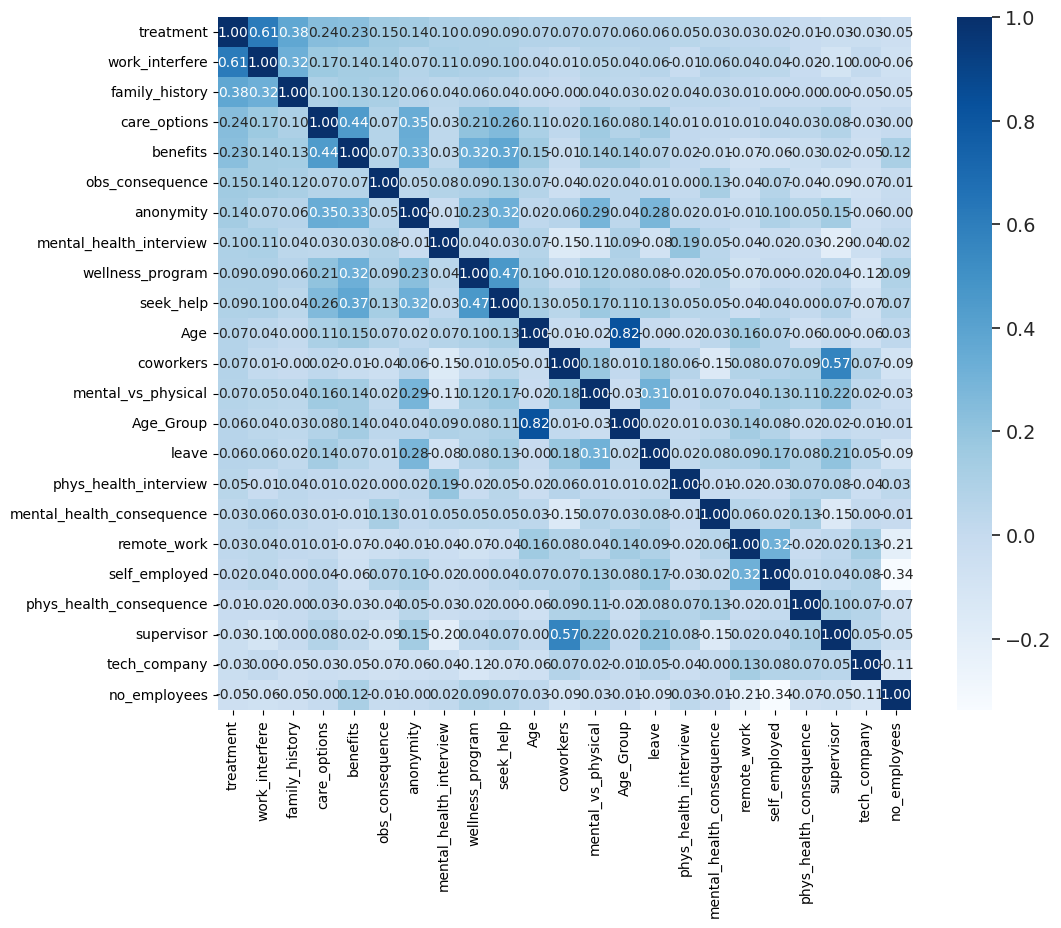

In [ ]:
f, ax = plt.subplots(figsize=(12, 9))
corrmat = df.corr()
k = 23 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cmap = 'Blues', cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# <b> <font color ='green' >5. Fitting



In [ ]:
y = df['treatment']
X = df.drop(columns='treatment')

# Chia tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# <b> <font color ='green' >6. Tuning


 <b> <font color ='green' >6.1 Writing Evaluate Model Function

In [ ]:
# Định nghĩa một hàm EvaluateModel để đánh giá mô hình dự đoán và lưu trữ kết quả của việc đánh giá vào từ điển methodDict
methodDict = {}
import time
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve, classification_report
from sklearn.model_selection import cross_val_score

def EvaluateModel(model, y_test, y_pred, plot=False):

    # Confusion matrix
    confusion = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

    # Training time start
    start_time = time.time()

    # visualize Confusion Matrix
    sns.heatmap(confusion, annot=True, fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Training time end
    end_time = time.time()
    training_time = end_time - start_time

    print('Training Time:', training_time, 'seconds')

    # Classification Accuracy:
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Classification Accuracy:', accuracy)

    # Classification Error:
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred))

    # Classification Report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Thêm accuracy vào methodDict với tên mô hình là khóa
    model_name = model.__class__.__name__
    methodDict[model_name] = {'accuracy': accuracy * 100, 'training_time': training_time}




## <b> <font color ='green' >6.2 Tuning


In [ ]:
#tìm kiếm ngẫu nhiên trên lưới siêu tham số của một mô hình, sử dụng phương pháp Cross Validation
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle = True, random_state = 2)

def RandomSearch(model, param_dist):
  reg_random = RandomizedSearchCV(estimator=model,
                    param_distributions=param_dist,
                    n_iter=10,
                    cv=kf,
                    n_jobs=8,
                    scoring='accuracy',
                    random_state =2)
  reg_random.fit(X_train,y_train)
  y_pred = reg_random.predict(X_test)
  print('RandomSearch. Best Score: ', reg_random.best_score_)
  print('RandomSearch. Best Params: ', reg_random.best_params_)
  accuracy_score = EvaluateModel(model, y_test, y_pred, plot =True)


# <b> <font color ='green' >7. Evaluate Models


## <b> <font color ='green' >7.1 Logistic Regression


Logistic Regression


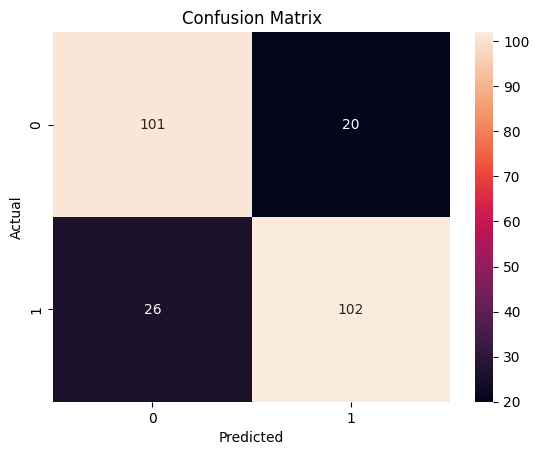

Training Time: 0.1780858039855957 seconds
Classification Accuracy: 0.8152610441767069
Classification Error: 0.18473895582329314
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       121
           1       0.84      0.80      0.82       128

    accuracy                           0.82       249
   macro avg       0.82      0.82      0.82       249
weighted avg       0.82      0.82      0.82       249



In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('Logistic Regression')

accuracy_score = EvaluateModel(logreg, y_test, y_pred, plot =True)

## <b> <font color ='green' >7.2 Gaussian Naive Bayes


Gaussian Naive Bayes


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomSearch. Best Score:  0.7809045226130652
RandomSearch. Best Params:  {'var_smoothing': 1e-09}


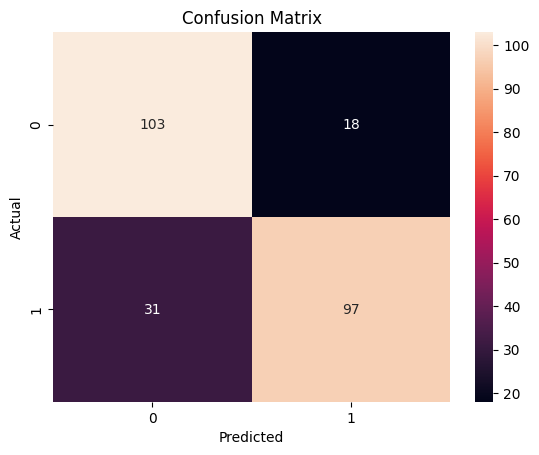

Training Time: 0.19899868965148926 seconds
Classification Accuracy: 0.8032128514056225
Classification Error: 0.19678714859437751
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       121
           1       0.84      0.76      0.80       128

    accuracy                           0.80       249
   macro avg       0.81      0.80      0.80       249
weighted avg       0.81      0.80      0.80       249



In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
param_dist = {'var_smoothing': [1e-09, 1e-08, 1e-07]}
print('Gaussian Naive Bayes')
RandomSearch(model, param_dist)


## <b> <font color ='green' >7.3 Support Vector Machine


Support Vector Machine
RandomSearch. Best Score:  0.8231155778894472
RandomSearch. Best Params:  {'kernel': 'rbf', 'gamma': 'auto', 'C': 1}


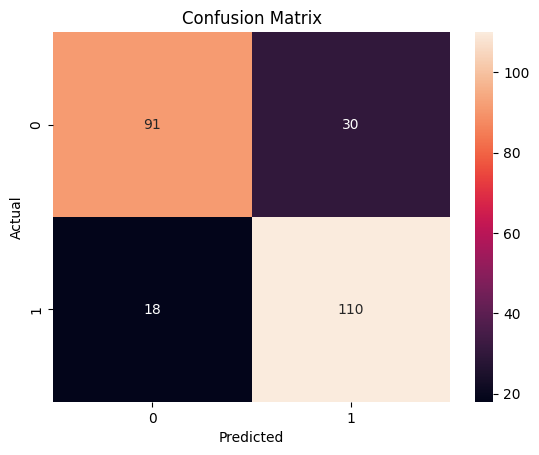

Training Time: 0.16251444816589355 seconds
Classification Accuracy: 0.8072289156626506
Classification Error: 0.19277108433734935
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       121
           1       0.79      0.86      0.82       128

    accuracy                           0.81       249
   macro avg       0.81      0.81      0.81       249
weighted avg       0.81      0.81      0.81       249



In [ ]:
from sklearn.svm import SVC

model_svc = SVC()

param_dist_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

print('Support Vector Machine')

RandomSearch(model_svc, param_dist_svc)


## <b> <font color ='green' >7.4 KNN


KNN
RandomSearch. Best Score:  0.807035175879397
RandomSearch. Best Params:  {'weights': 'distance', 'n_neighbors': 28}


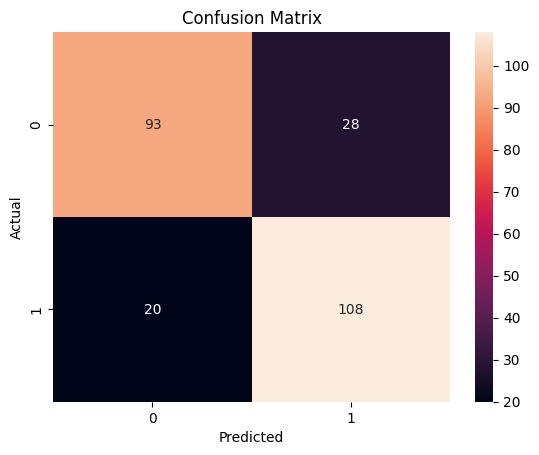

Training Time: 0.2002391815185547 seconds
Classification Accuracy: 0.8072289156626506
Classification Error: 0.19277108433734935
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       121
           1       0.79      0.84      0.82       128

    accuracy                           0.81       249
   macro avg       0.81      0.81      0.81       249
weighted avg       0.81      0.81      0.81       249



In [ ]:
model = KNeighborsClassifier()

param_dist = {'n_neighbors': list(range(1,31)),
              'weights' :['uniform', 'distance']}


print('KNN')

RandomSearch(model, param_dist)


## <b> <font color ='green' >7.5 Decision-Tree


Decision-Tree
RandomSearch. Best Score:  0.8281407035175878
RandomSearch. Best Params:  {'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 17, 'max_depth': 2, 'criterion': 'entropy'}


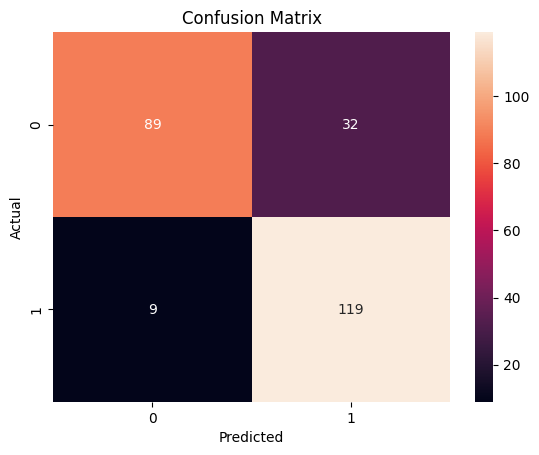

Training Time: 0.1621406078338623 seconds
Classification Accuracy: 0.8353413654618473
Classification Error: 0.16465863453815266
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.81       121
           1       0.79      0.93      0.85       128

    accuracy                           0.84       249
   macro avg       0.85      0.83      0.83       249
weighted avg       0.85      0.84      0.83       249



In [ ]:
model_2 = DecisionTreeClassifier()
param_dist = {'max_depth': list(range(1, 9)),
              "max_features": list(range(1, len(X.columns))),
              "min_samples_split": list(range(2, 9)),
              "min_samples_leaf": list(range(1, 9)),
              "criterion": ["gini", "entropy"],
              }

print('Decision-Tree')
RandomSearch(model_2, param_dist)

## <b> <font color ='green' >7.6 RandomForest


Random Forest
RandomSearch. Best Score:  0.8291457286432161
RandomSearch. Best Params:  {'n_estimators': 12, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 12, 'max_depth': 4, 'criterion': 'gini'}


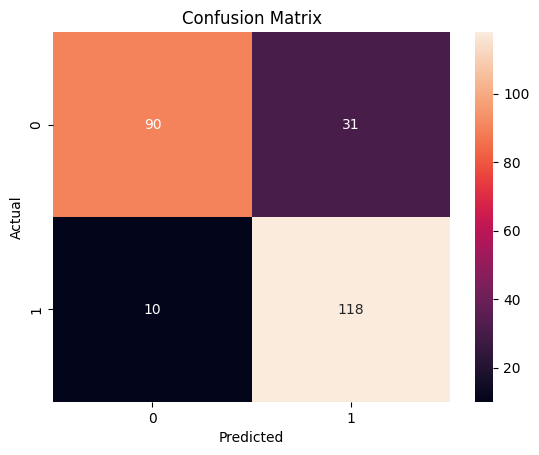

Training Time: 0.16120505332946777 seconds
Classification Accuracy: 0.8353413654618473
Classification Error: 0.16465863453815266
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       121
           1       0.79      0.92      0.85       128

    accuracy                           0.84       249
   macro avg       0.85      0.83      0.83       249
weighted avg       0.84      0.84      0.83       249



In [ ]:
model_3 = RandomForestClassifier()
estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 10)]
param_dist = {'n_estimators' : estimators,
             'max_depth': list(range(1, 9)),
              "max_features": list(range(1, len(X.columns))),
              "min_samples_split": list(range(3, 9)),
              "min_samples_leaf": list(range(1, 9)),
              "criterion": ["gini", "entropy"]}


print('Random Forest')

RandomSearch(model_3, param_dist)


## <b> <font color ='green' >7.7 AdaBoosting


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoosting


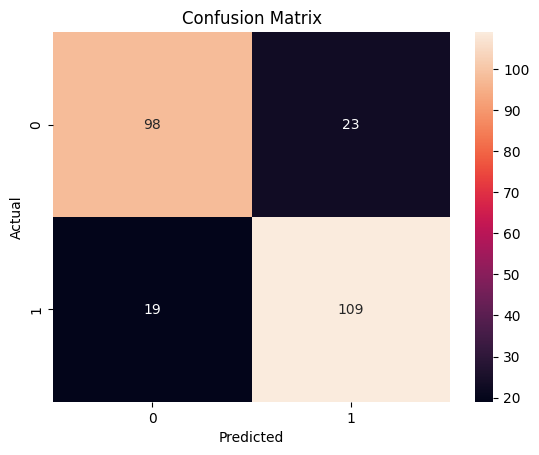

Training Time: 0.18275880813598633 seconds
Classification Accuracy: 0.8313253012048193
Classification Error: 0.1686746987951807
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       121
           1       0.83      0.85      0.84       128

    accuracy                           0.83       249
   macro avg       0.83      0.83      0.83       249
weighted avg       0.83      0.83      0.83       249



In [ ]:
tree = DecisionTreeClassifier(max_depth = 1)
model = AdaBoostClassifier(base_estimator= tree, n_estimators= 100,random_state = 2)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('AdaBoosting')

EvaluateModel(model, y_test, y_pred, True)

## <b> <font color ='green' >7.8 GradientBoosting


GradientBoosting


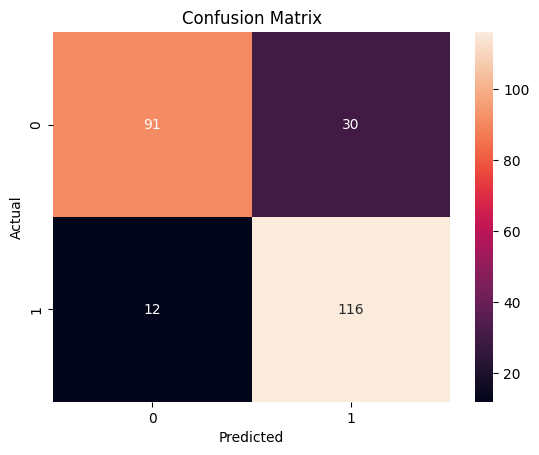

Training Time: 0.16289329528808594 seconds
Classification Accuracy: 0.8313253012048193
Classification Error: 0.1686746987951807
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       121
           1       0.79      0.91      0.85       128

    accuracy                           0.83       249
   macro avg       0.84      0.83      0.83       249
weighted avg       0.84      0.83      0.83       249



In [ ]:
model = GradientBoostingClassifier(n_estimators =100, max_depth =1,random_state = 2 )
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('GradientBoosting')

EvaluateModel(model, y_test, y_pred, True)

## <b> <font color ='green' >7.9 Bagging


Bagging


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


RandomSearch. Best Score:  0.8281407035175878
RandomSearch. Best Params:  {'base_estimator__max_depth': 1}


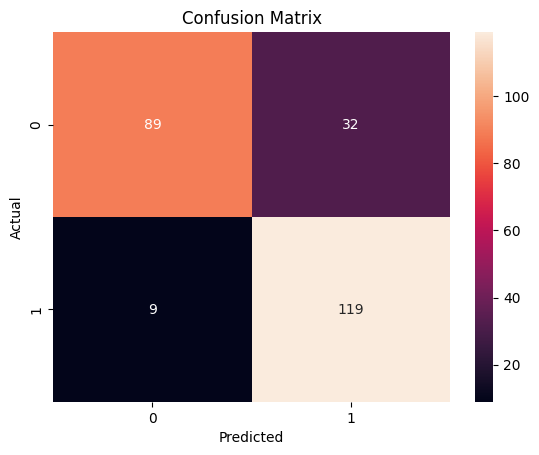

Training Time: 0.32535433769226074 seconds
Classification Accuracy: 0.8353413654618473
Classification Error: 0.16465863453815266
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.81       121
           1       0.79      0.93      0.85       128

    accuracy                           0.84       249
   macro avg       0.85      0.83      0.83       249
weighted avg       0.85      0.84      0.83       249



In [ ]:
tree = DecisionTreeClassifier()

model_4 = BaggingClassifier(base_estimator = tree, bootstrap_features=False, n_estimators = 100,random_state = 2)
param_dist = {'base_estimator__max_depth' : [1,2,3]}


print('Bagging')

RandomSearch(model_4, param_dist)


## <b> <font color ='green' >7.10 Light GBM


LightGBM Random Search
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 501, number of negative: 494
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 48
[LightGBM] [Info] Number of data points in the train set: 995, number of used features: 14
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503518 -> initscore=0.014071
[LightGBM] [Info] Start 

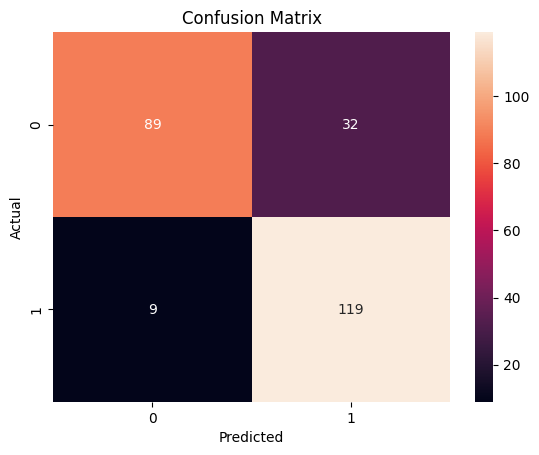

Training Time: 0.1828782558441162 seconds
Classification Accuracy: 0.8353413654618473
Classification Error: 0.16465863453815266
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.81       121
           1       0.79      0.93      0.85       128

    accuracy                           0.84       249
   macro avg       0.85      0.83      0.83       249
weighted avg       0.85      0.84      0.83       249



In [ ]:
import lightgbm as lgb
model_lgb = lgb.LGBMClassifier()
param_dist_lgb = {
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'num_leaves': list(range(20, 150)),
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'subsample_for_bin': list(range(20000, 300000, 20000)),
    'min_child_samples': list(range(20, 500, 5)),
    'reg_alpha': [0, 0.1, 0.5, 1, 2],
    'reg_lambda': [0, 0.1, 0.5, 1, 2],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}
print('LightGBM Random Search')
RandomSearch(model_lgb, param_dist_lgb)


## <b> <font color ='green' >7.11 XG Boost


XGBoost Random Search
RandomSearch. Best Score:  0.8170854271356782
RandomSearch. Best Params:  {'subsample': 1.0, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.001, 'gamma': 0.4, 'colsample_bytree': 1.0}


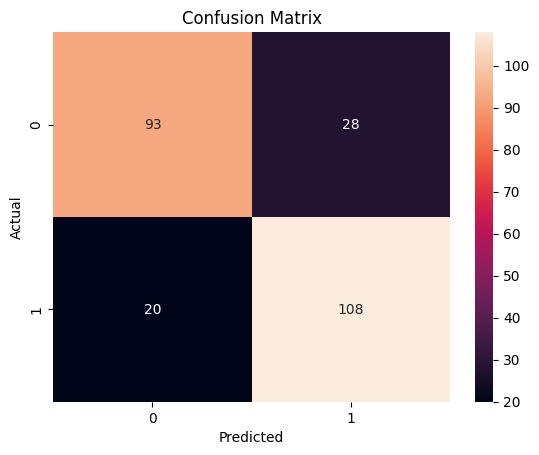

Training Time: 0.16922545433044434 seconds
Classification Accuracy: 0.8072289156626506
Classification Error: 0.19277108433734935
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       121
           1       0.79      0.84      0.82       128

    accuracy                           0.81       249
   macro avg       0.81      0.81      0.81       249
weighted avg       0.81      0.81      0.81       249



In [ ]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier()
param_dist_xgb = {
    'max_depth': list(range(3, 10)),
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 300, 500, 800, 1000],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}
print('XGBoost Random Search')
RandomSearch(model_xgb, param_dist_xgb)


## <b> <font color ='green' >7.12 Stacking


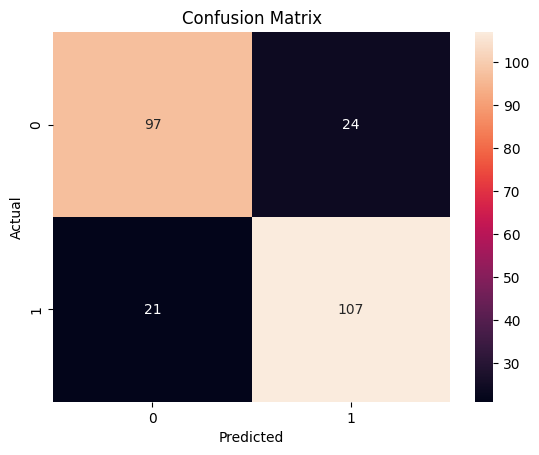

Training Time: 0.18427419662475586 seconds
Classification Accuracy: 0.8192771084337349
Classification Error: 0.1807228915662651
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       121
           1       0.82      0.84      0.83       128

    accuracy                           0.82       249
   macro avg       0.82      0.82      0.82       249
weighted avg       0.82      0.82      0.82       249



In [ ]:
from sklearn.ensemble import StackingClassifier
base_models = [
    ('random_forest', RandomForestClassifier()),
    ('gaussian_nb', DecisionTreeClassifier()),
    ('k_neighbors', KNeighborsClassifier())
]
model_stacking = StackingClassifier(estimators=base_models)
model_stacking.fit(X_train, y_train)
y_pred = model_stacking.predict(X_test)
EvaluateModel(model_stacking, y_test, y_pred, plot=True)


# <b> <font color ='green' >8. Method Comparison


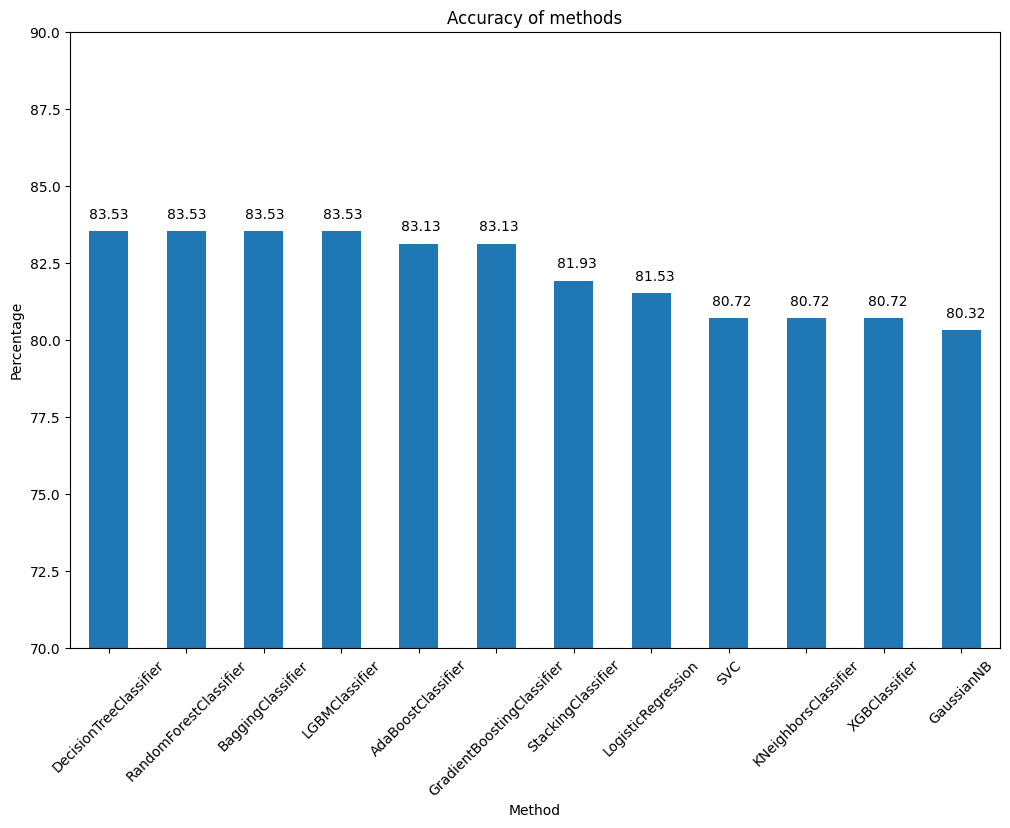

In [ ]:
s = pd.Series(methodDict)
s = s.apply(lambda x: x['accuracy'])  # Trích xuất giá trị 'accuracy' từ từng dict
s = s.sort_values(ascending=False)  # Sắp xếp theo giá trị accuracy
plt.figure(figsize=(12, 8))

ax = s.plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.ylim([70.0, 90.0])
plt.xticks(rotation=45)
plt.xlabel('Method')
plt.ylabel('Percentage')
plt.title('Accuracy of methods')

plt.show()




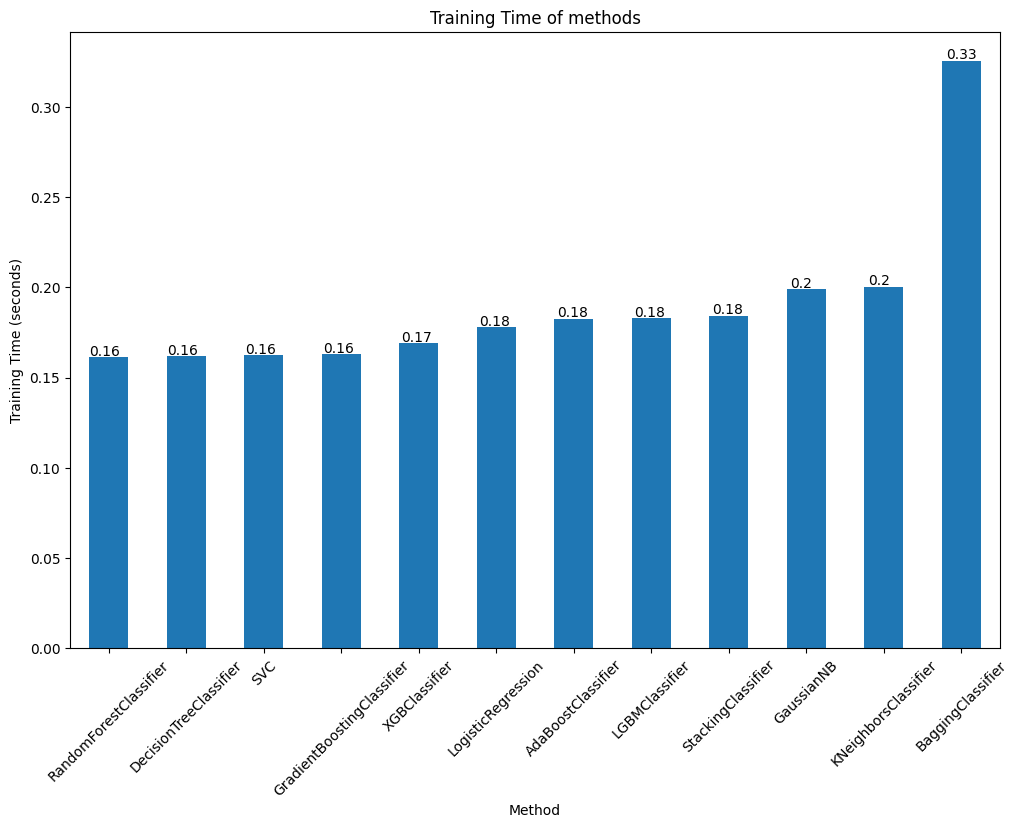

In [ ]:
s = pd.Series(methodDict)
s = s.apply(lambda x: x['training_time'])  # Trích xuất giá trị 'training_time' từ từng dict
s = s.sort_values(ascending=True)  # Sắp xếp theo giá trị training time
plt.figure(figsize=(12, 8))

ax = s.plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.xticks(rotation=45)
plt.xlabel('Method')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time of methods')

plt.show()


# <b> <font color ='green' >9. Prediction on test

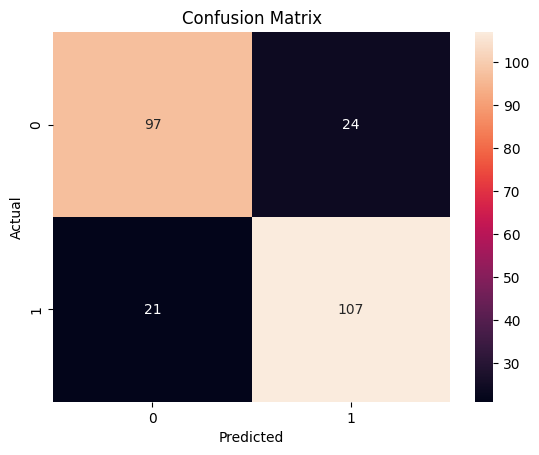

Training Time: 0.9096012115478516 seconds
Classification Accuracy: 0.8192771084337349
Classification Error: 0.1807228915662651
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       121
           1       0.82      0.84      0.83       128

    accuracy                           0.82       249
   macro avg       0.82      0.82      0.82       249
weighted avg       0.82      0.82      0.82       249



In [ ]:
#Vì RandomForest, DecisionTree, SVC, GradientBoosting đều có cùng thời gian training và accuracy nên tôi sẽ chọn DecisionTree với parameters tốt nhất
model = DecisionTreeClassifier(min_samples_split= 7, min_samples_leaf= 7,
                               max_features= 17, max_depth = 2, criterion = 'gini')

model.fit(X_train, y_train)
dfTestPredictions = model.predict(X_test)
EvaluateModel(model, y_test, y_pred, True)